## DBSCAN Project
#### Enrico Absin
### EDA
TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.

     Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0          2  12669   9656     7561     214              2674        1338
1          2   7057   9810     9568    1762              3293        1776
2          2   6353   8808     7684    2405              3516        7844
3          1  13265   1196     4221    6404               507        1788
4          2  22615   5410     7198    3915              1777        5185
..       ...    ...    ...      ...     ...               ...         ...
435        1  29703  12051    16027   13135               182        2204
436        1  39228   1431      764    4510                93        2346
437        2  14531  15488    30243     437             14841        1867
438        1  10290   1981     2232    1038               168        2125
439        1   2787   1698     2510      65               477          52

[440 rows x 7 columns]


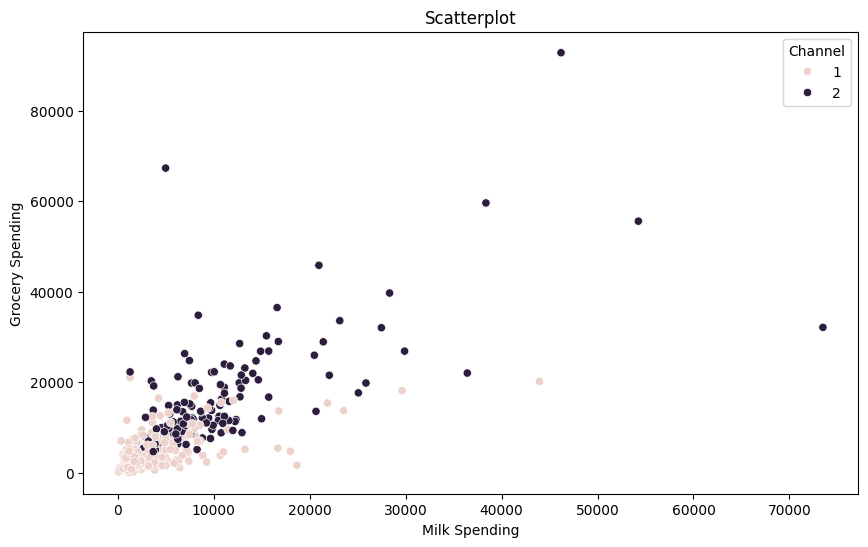

In [50]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

wholesale_customers = fetch_ucirepo(id=292)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

print(X)

df = pd.DataFrame(X, columns=wholesale_customers.variables.name)

df['Region'] = y
df.head()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')
plt.title('Scatterplot')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.legend(title='Channel')
plt.show()

TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?

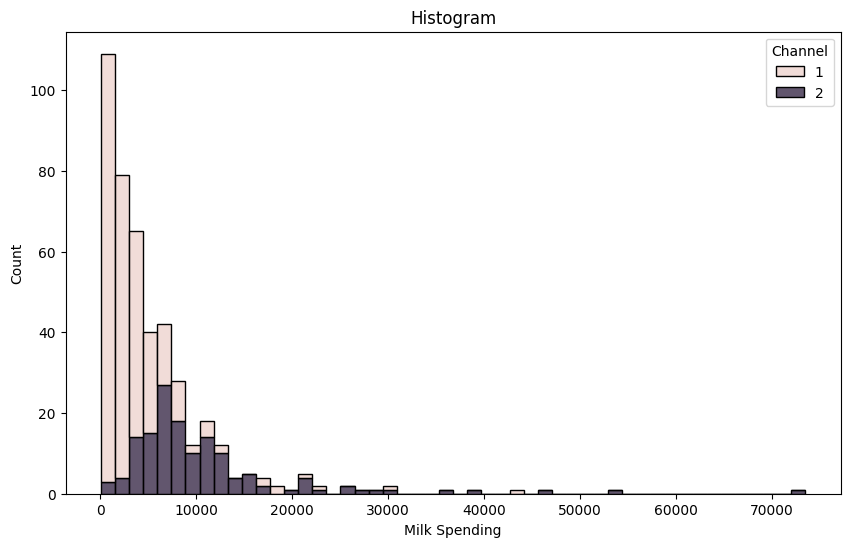

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack')
plt.title('Histogram')
plt.xlabel('Milk Spending')
plt.ylabel('Count')
plt.show()

TASK: Create an annotated clustermap of the correlations between spending on different cateogires.

<Figure size 1200x800 with 0 Axes>

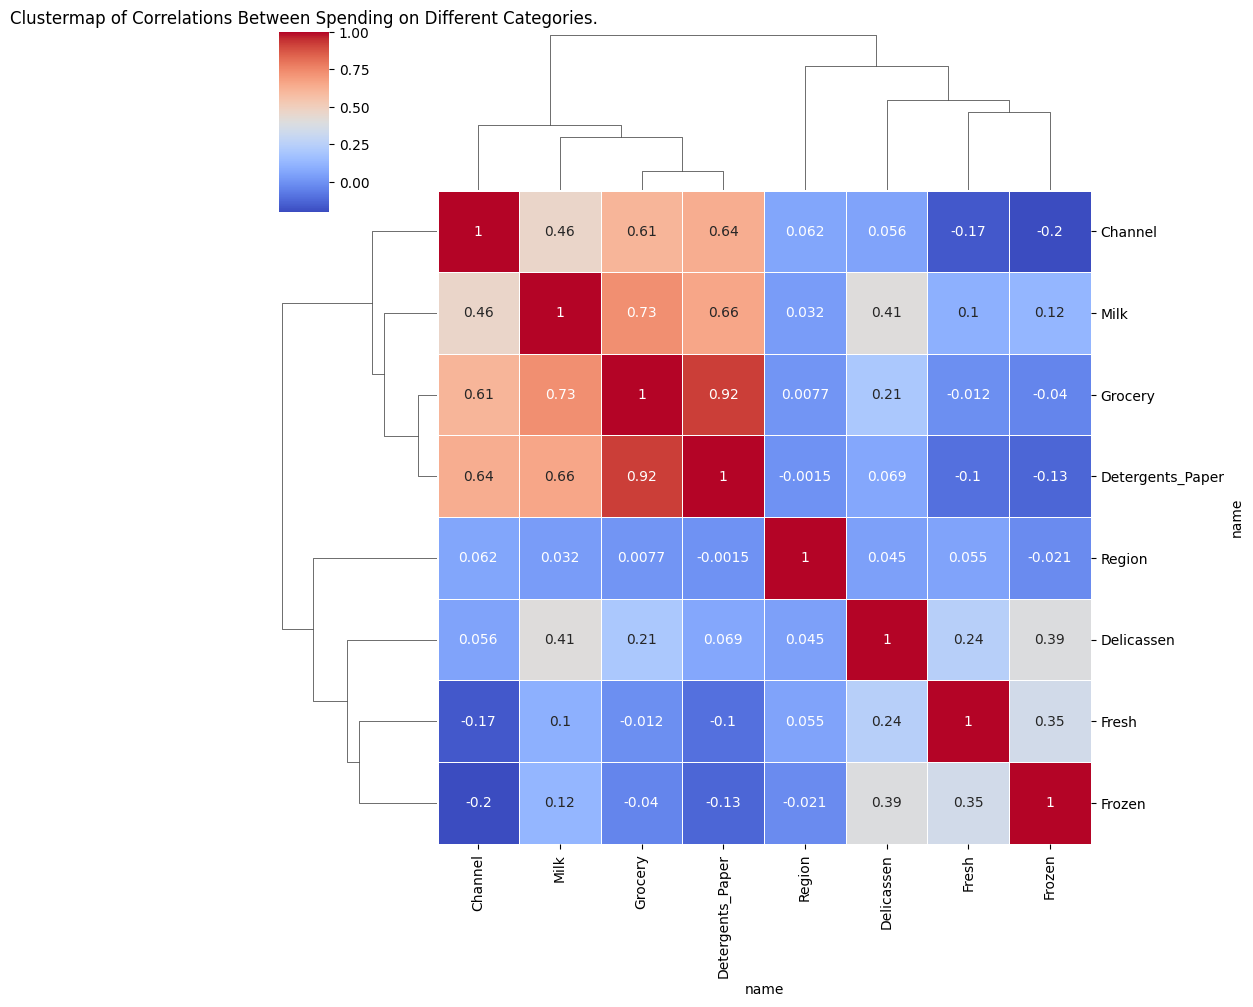

In [5]:
corr_matrix = df.corr()

corr_matrix.fillna(0, inplace=True)
corr_matrix = corr_matrix.replace([np.inf, -np.inf], 0)

plt.figure(figsize=(12, 8))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Clustermap of Correlations Between Spending on Different Categories.')
plt.show()

TASK: Create a PairPlot of the dataframe, colored by Region.

<Figure size 1200x1200 with 0 Axes>

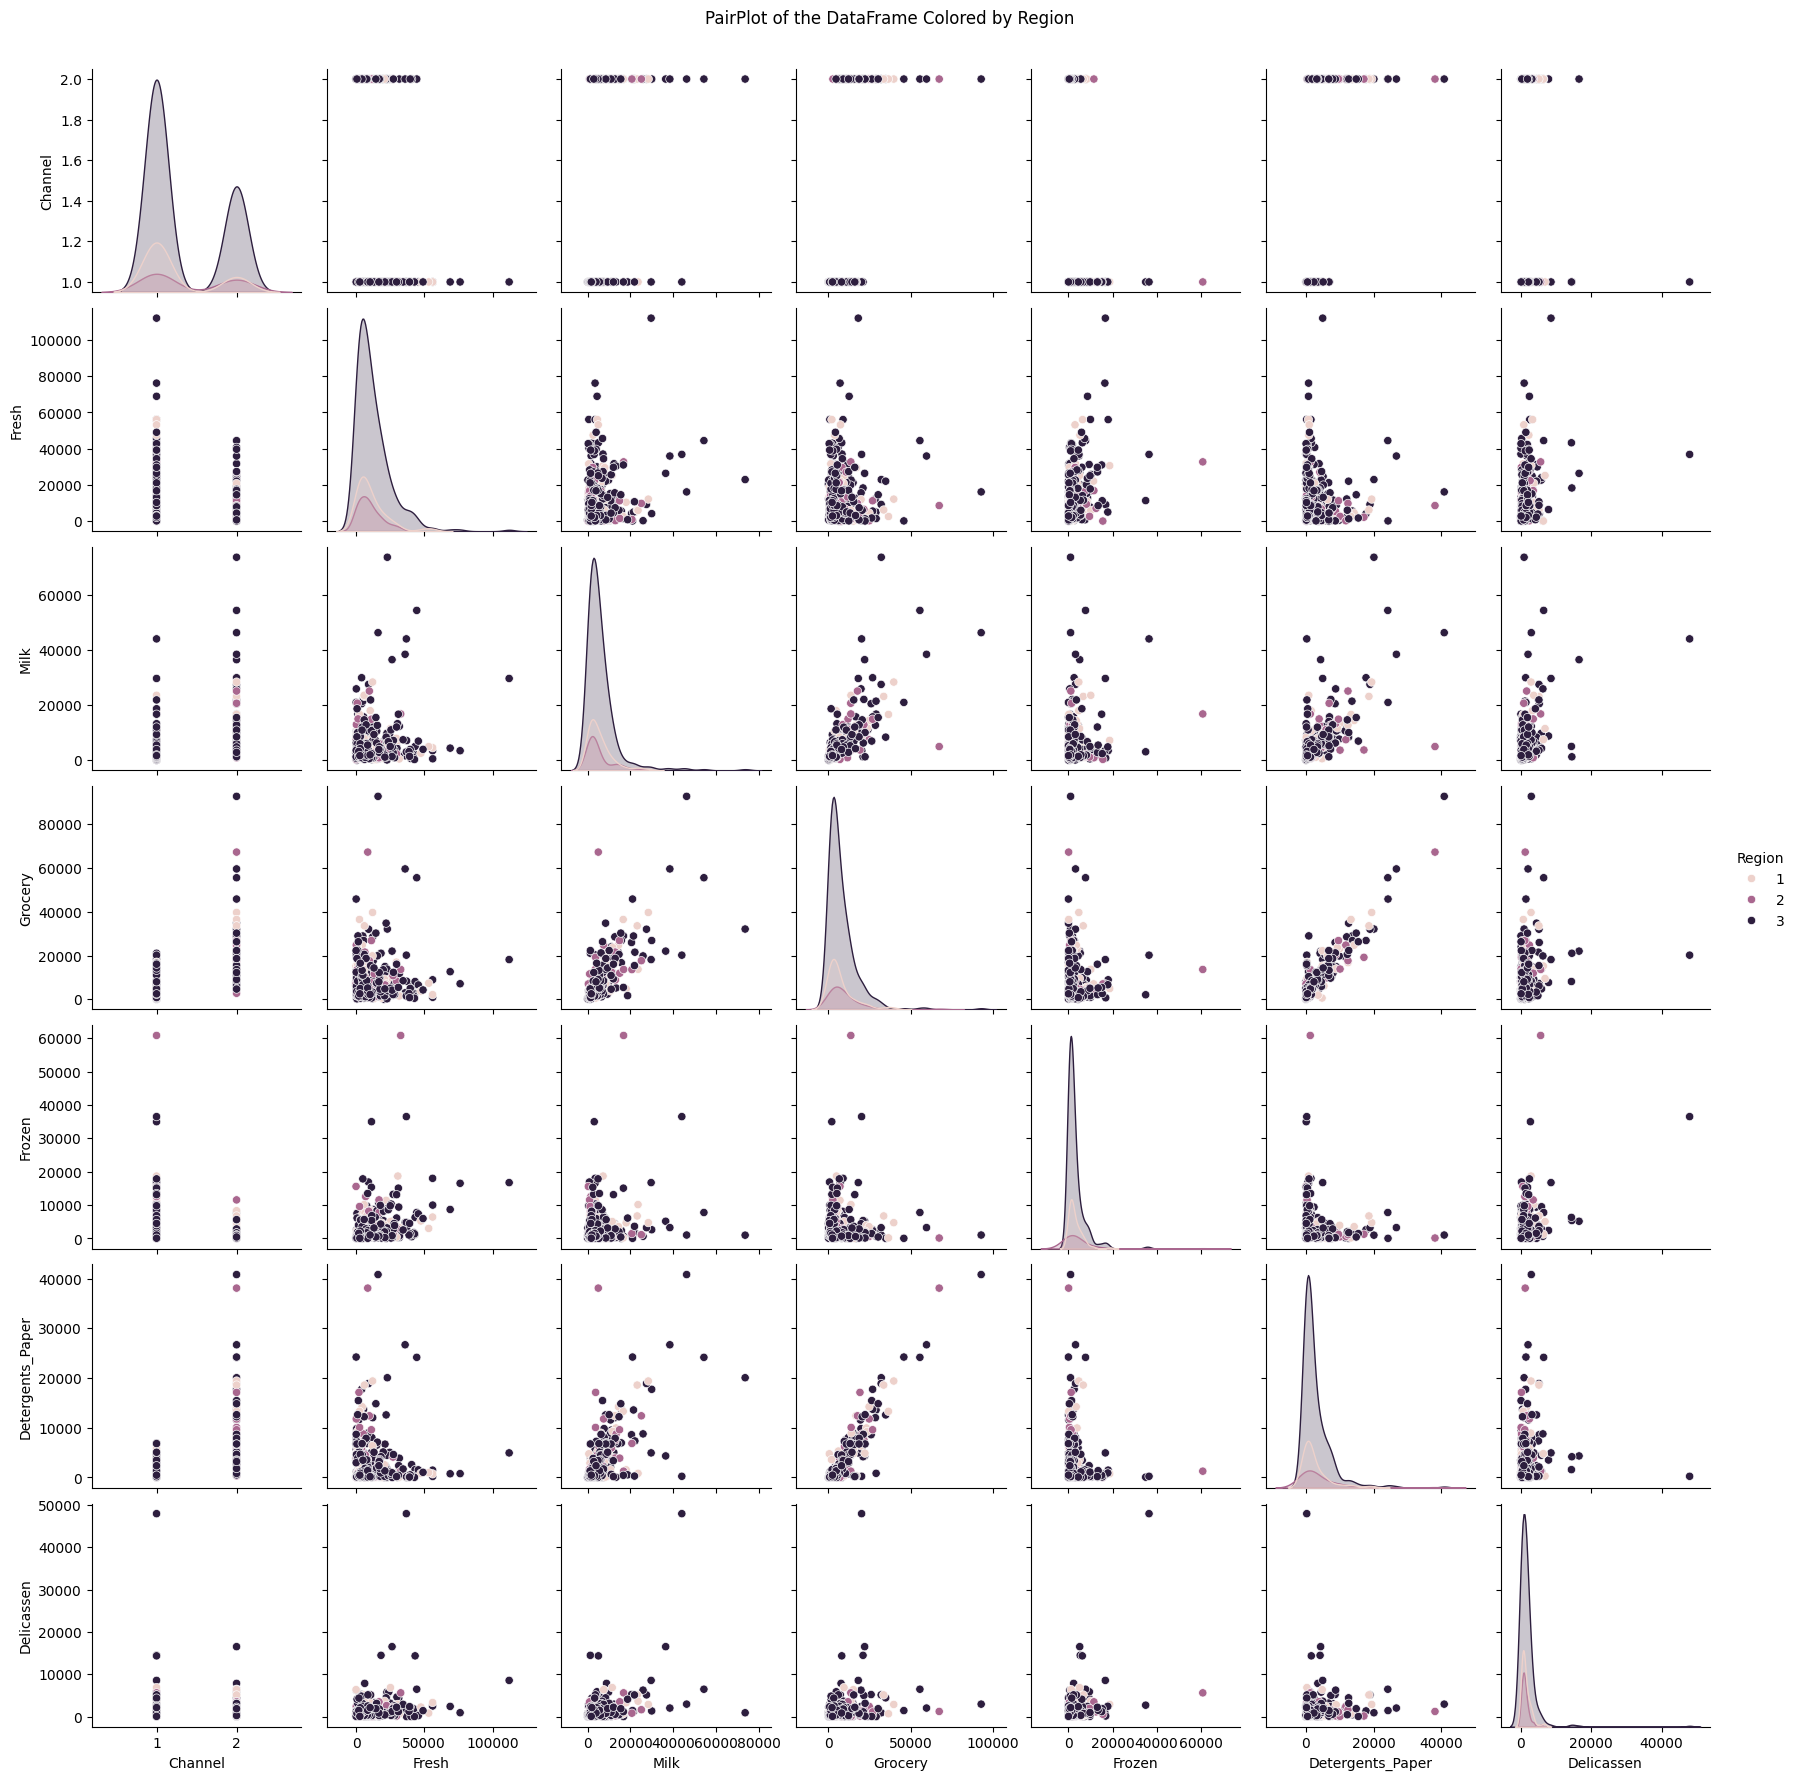

In [6]:
plt.figure(figsize=(12, 12))
sns.pairplot(df, hue='Region')
plt.suptitle('PairPlot of the DataFrame Colored by Region', y=1.02)
plt.show()

### DBSCAN
TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.\
TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

epsilon_values = np.linspace(0.001, 3, 50)

percentage_outliers = []

min_samples = 2 * X.shape[1]

for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    
    dbscan.fit(X_scaled)
    
    percentage_outlier = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100
    
    percentage_outliers.append(percentage_outlier)

    print(f"Epsilon: {epsilon:.3f}, Outlier Percentage: {percentage_outlier:.2f}%")

Epsilon: 0.001, Outlier Percentage: 100.00%
Epsilon: 0.062, Outlier Percentage: 100.00%
Epsilon: 0.123, Outlier Percentage: 100.00%
Epsilon: 0.185, Outlier Percentage: 100.00%
Epsilon: 0.246, Outlier Percentage: 100.00%
Epsilon: 0.307, Outlier Percentage: 86.59%
Epsilon: 0.368, Outlier Percentage: 75.23%
Epsilon: 0.429, Outlier Percentage: 67.05%
Epsilon: 0.491, Outlier Percentage: 62.95%
Epsilon: 0.552, Outlier Percentage: 57.27%
Epsilon: 0.613, Outlier Percentage: 49.09%
Epsilon: 0.674, Outlier Percentage: 40.23%
Epsilon: 0.735, Outlier Percentage: 32.95%
Epsilon: 0.797, Outlier Percentage: 27.95%
Epsilon: 0.858, Outlier Percentage: 23.18%
Epsilon: 0.919, Outlier Percentage: 20.23%
Epsilon: 0.980, Outlier Percentage: 17.05%
Epsilon: 1.041, Outlier Percentage: 15.00%
Epsilon: 1.103, Outlier Percentage: 13.18%
Epsilon: 1.164, Outlier Percentage: 12.50%
Epsilon: 1.225, Outlier Percentage: 11.82%
Epsilon: 1.286, Outlier Percentage: 10.68%
Epsilon: 1.347, Outlier Percentage: 8.86%
Epsilon

TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.

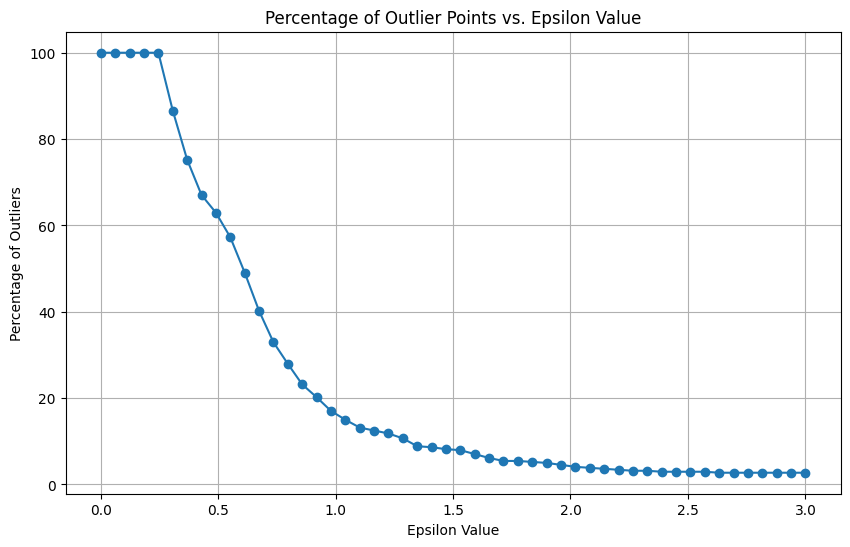

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, percentage_outliers, marker='o')
plt.title('Percentage of Outlier Points vs. Epsilon Value')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outliers')
plt.grid(True)
plt.show()

TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.

In [14]:
dbscan_model = DBSCAN(eps=2, min_samples=2*X.shape[1])  
dbscan_labels = dbscan_model.fit_predict(X)

TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.

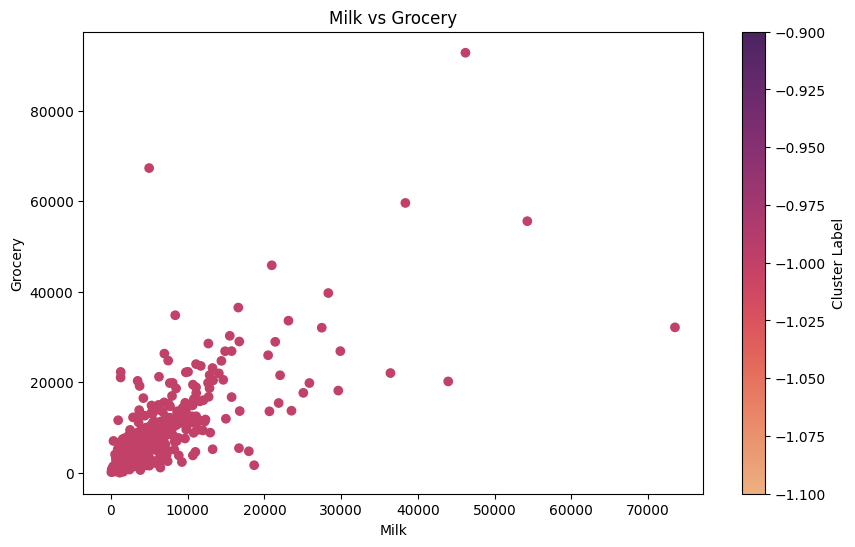

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Grocery'], c=dbscan_labels, cmap='flare')
plt.title('Milk vs Grocery')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.colorbar(label='Cluster Label')
plt.show()

TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.

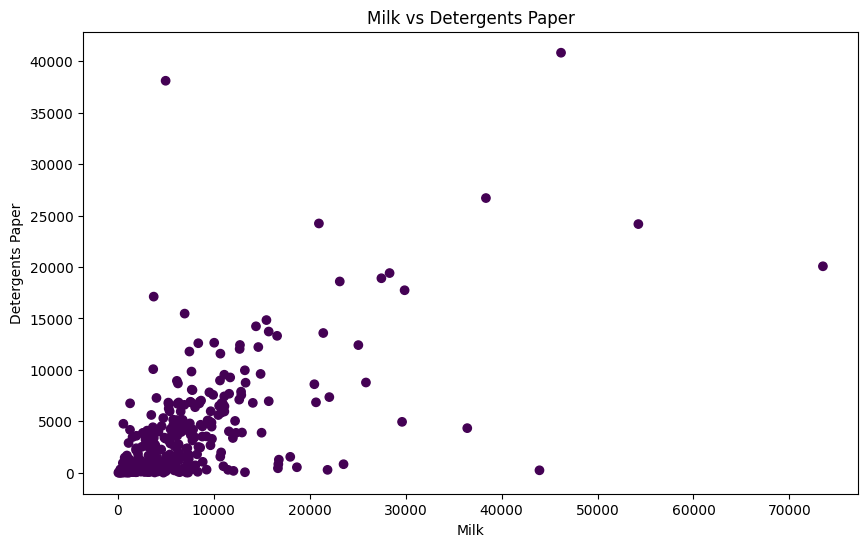

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Detergents_Paper'], c=dbscan_labels, cmap='viridis')
plt.title('Milk vs Detergents Paper')
plt.xlabel('Milk')
plt.ylabel('Detergents Paper')
plt.show()

TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.

In [27]:
df['Labels'] = dbscan_labels
df.head()

name,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,-1
1,2,3,7057,9810,9568,1762,3293,1776,-1
2,2,3,6353,8808,7684,2405,3516,7844,-1
3,1,3,13265,1196,4221,6404,507,1788,-1
4,2,3,22615,5410,7198,3915,1777,5185,-1


TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.

In [48]:
cluster_means = df.groupby('Labels').mean()
outlier_means = df[df['Labels'] == -1].mean()

print("Cluster Means:")
print(cluster_means)
print("\nOutlier Means:")
print(outlier_means)

Cluster Means:
name     Channel    Region         Fresh         Milk      Grocery  \
Labels                                                               
-1      1.322727  2.543182  12000.297727  5796.265909  7951.277273   

name         Frozen  Detergents_Paper   Delicassen   Cluster  
Labels                                                        
-1      3071.931818       2881.493182  1524.870455  0.147727  

Outlier Means:
name
Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Labels                 -1.000000
Cluster                 0.147727
dtype: float64


TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.

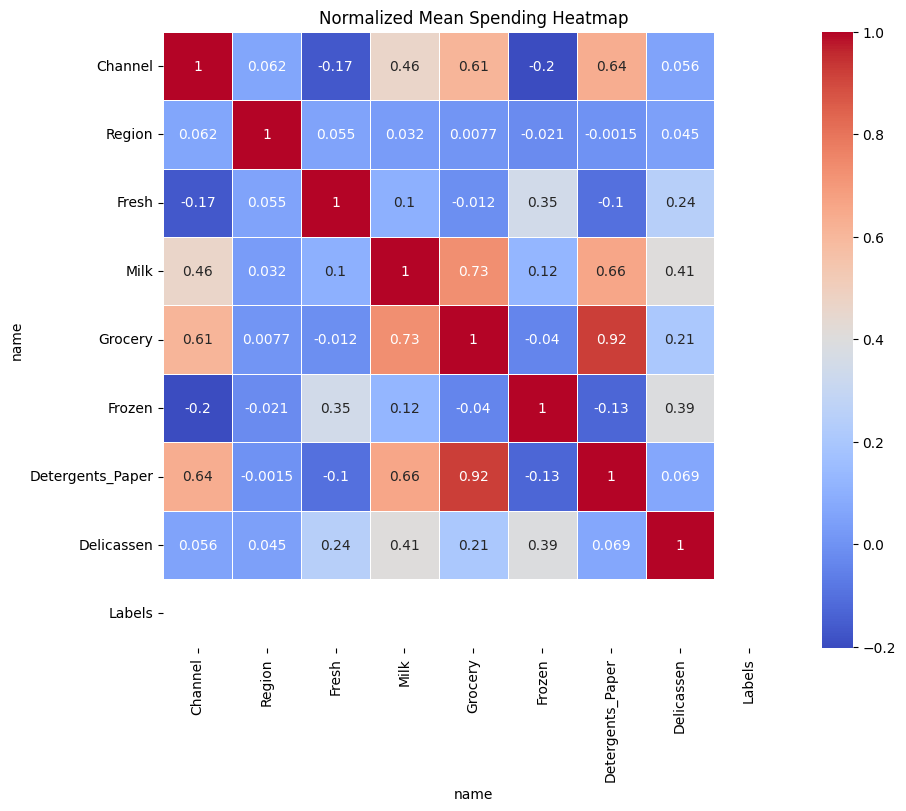

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.figure(figsize=(10, 8))
sns.heatmap(normalized_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Normalized Mean Spending Heatmap')
plt.show()

TASK: Create another heatmap similar to the one above, but with the outliers removed

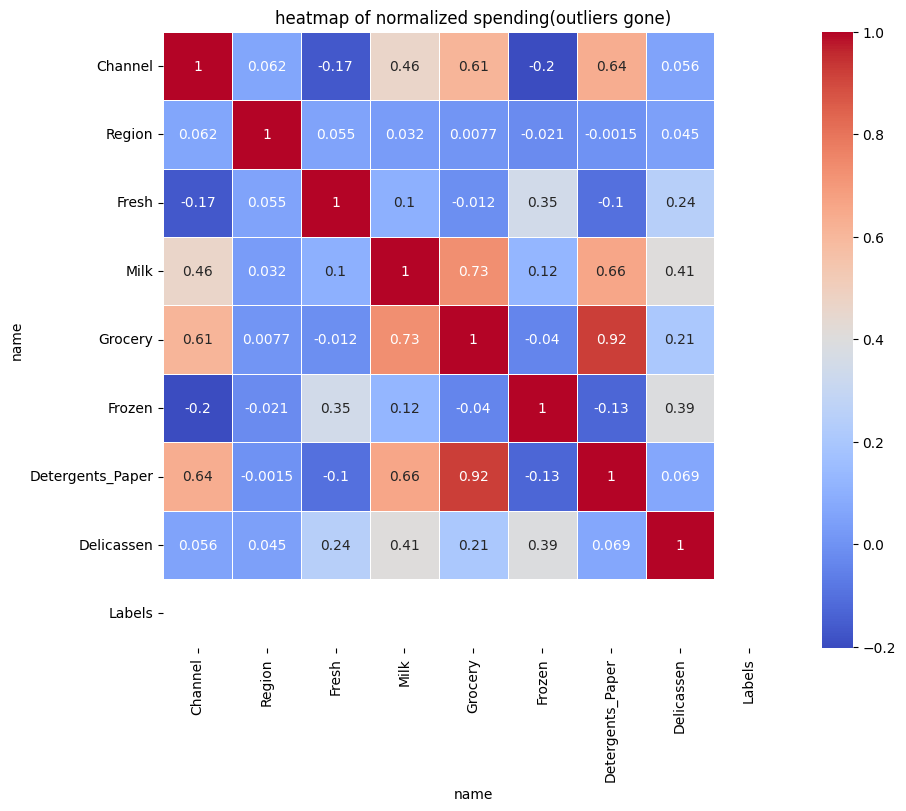

In [41]:
filtered_df = normalized_df[normalized_df['Labels'] != -1]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('heatmap of normalized spending(outliers gone)')
plt.show()

TASK: What spending category were the two clusters mode different in?

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df.drop('Region', axis=1))

df['Cluster'] = cluster_labels

centroids = kmeans.cluster_centers_

largest_difference_index = np.abs(centroids[1] - centroids[0]).argmax()
largest_difference_category = df.drop(['Region', 'Cluster'], axis=1).columns[largest_difference_index]

print("The spending category with the largest differences between the two clusters is:", largest_difference_category)

The spending category with the largest differences between the two clusters is: Fresh
